<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.1 - Exploratory data analysis
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [3]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_number          2747 non-null   int64  
 1   quantity_ordered      2747 non-null   int64  
 2   price_per_unit        2747 non-null   float64
 3   orderline_number      2747 non-null   int64  
 4   sales                 2747 non-null   float64
 5   order_date            2747 non-null   object 
 6   days_since_lastorder  2747 non-null   int64  
 7   status                2747 non-null   object 
 8   productline           2747 non-null   object 
 9   retail_price          2747 non-null   int64  
 10  product_code          2747 non-null   object 
 11  customer_name         2747 non-null   object 
 12  phone                 2747 non-null   object 
 13  address               2747 non-null   object 
 14  city                  2747 non-null   object 
 15  postalcode            2747

In [4]:
# chọn mốc thời gian '2020-9-30'  làm time stone vì đó là cuối quý 3 năm 2020
timestone = '2020-9-30'

processed_df['order_date'] = pd.to_datetime(processed_df['order_date'], dayfirst=True)

# Recency
processed_df['Recency'] = (pd.to_datetime(timestone) - processed_df['order_date']).dt.days 

# Frequency
frequency = processed_df.drop_duplicates(subset= 'order_number').groupby('customer_name')['order_number'].count().reset_index(name='Frequency')

# Monetary
monetary = processed_df.groupby('customer_name')['sales'].sum().reset_index(name='Monetary')

# merge 3 columns and customer
rfm = frequency.merge(monetary, on='customer_name')
rfm = rfm.merge(processed_df[['customer_name', 'Recency']], on='customer_name')

rfm_segment = rfm.groupby('customer_name').agg({'Frequency': 'mean', 'Monetary': 'sum', 'Recency': 'min'}).reset_index()

rfm_segment


/tmp/ipykernel_53557/2638464235.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  processed_df['order_date'] = pd.to_datetime(processed_df['order_date'], dayfirst=True)


,customer_name,Frequency,Monetary,Recency
0,"AV Stores, Co.",3.0,8048198.31,318
1,Alpha Cognac,3.0,1409768.80,186
2,Amica Models & Co.,2.0,2447048.76,387
3,"Anna's Decorations, Ltd",4.0,7083821.98,205
4,Atelier graphique,3.0,169259.72,310
...,...,...,...,...
84,"Vida Sport, Ltd",2.0,3649120.36,397
85,Vitachrome Inc.,3.0,2201031.50,330
86,"Volvo Model Replicas, Co",4.0,1439342.72,316
87,West Coast Collectables Co.,2.0,599100.32,610


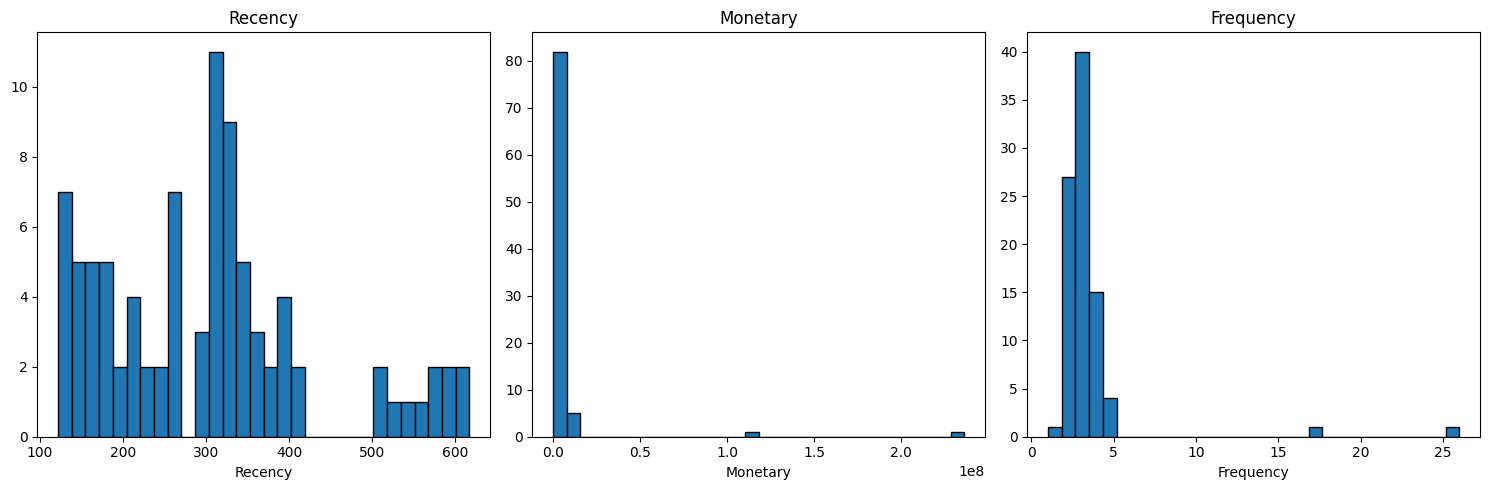

In [5]:
cols = ['Recency', 'Monetary', 'Frequency']
# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(cols):
    ax[i].hist(rfm_segment[col], bins=30, edgecolor='black')
    ax[i].set_xlabel(col)
    ax[i].set_title(f'{col}')
plt.tight_layout()

plt.show()

In [6]:
def segment(row):
    if (row['Recency']  <= 270 and row['Frequency'] >= 15) or row['Monetary'] >= 6000000:
        return 'Important Value Customer'
    elif row['Frequency'] <= 1 and row['Recency'] >= 500:
        return 'Low-Value Customer'
    else:
        return 'General Value Customer'

rfm_segment['Segment'] = rfm_segment.agg(segment, axis=1)
rfm_segment

,customer_name,Frequency,Monetary,Recency,Segment
0,"AV Stores, Co.",3.0,8048198.31,318,Important Value Customer
1,Alpha Cognac,3.0,1409768.80,186,General Value Customer
2,Amica Models & Co.,2.0,2447048.76,387,General Value Customer
3,"Anna's Decorations, Ltd",4.0,7083821.98,205,Important Value Customer
4,Atelier graphique,3.0,169259.72,310,General Value Customer
...,...,...,...,...,...
84,"Vida Sport, Ltd",2.0,3649120.36,397,General Value Customer
85,Vitachrome Inc.,3.0,2201031.50,330,General Value Customer
86,"Volvo Model Replicas, Co",4.0,1439342.72,316,General Value Customer
87,West Coast Collectables Co.,2.0,599100.32,610,General Value Customer


In [7]:
rfm_segment['Segment'].value_counts().to_frame().reset_index()

,Segment,count
0,General Value Customer,77
1,Important Value Customer,12


In [8]:
merge_df = processed_df.merge(rfm_segment[['Segment', 'customer_name']], on='customer_name')
merge_df

,order_number,quantity_ordered,price_per_unit,orderline_number,sales,order_date,days_since_lastorder,status,productline,retail_price,...,phone,address,city,postalcode,country,last_name,first_name,deal_size,Recency,Segment
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,949,Important Value Customer
1,10329,42,104.67,1,4396.14,2019-11-15,216,Shipped,Motorcycles,95,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium,320,Important Value Customer
2,10107,39,99.91,5,3896.49,2018-02-24,878,Shipped,Motorcycles,118,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium,949,Important Value Customer
3,10329,20,158.80,2,3176.00,2019-11-15,266,Shipped,Motorcycles,118,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium,320,Important Value Customer
4,10107,27,224.65,4,6065.55,2018-02-24,902,Shipped,Motorcycles,193,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium,949,Important Value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10290,45,114.92,1,5171.40,2019-09-07,2289,Shipped,Vintage Cars,97,...,6175558428,16780 Pompton St.,Brickhaven,58339,USA,Taylor,Leslie,Medium,389,General Value Customer
2743,10352,23,102.29,3,2352.67,2019-12-03,2660,Shipped,Ships,90,...,6175558428,16780 Pompton St.,Brickhaven,58339,USA,Taylor,Leslie,Small,302,General Value Customer
2744,10352,49,100.72,2,4935.28,2019-12-03,2687,Shipped,Planes,99,...,6175558428,16780 Pompton St.,Brickhaven,58339,USA,Taylor,Leslie,Medium,302,General Value Customer
2745,10352,22,75.51,1,1661.22,2019-12-03,2869,Shipped,Planes,74,...,6175558428,16780 Pompton St.,Brickhaven,58339,USA,Taylor,Leslie,Small,302,General Value Customer


/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nguyennt/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

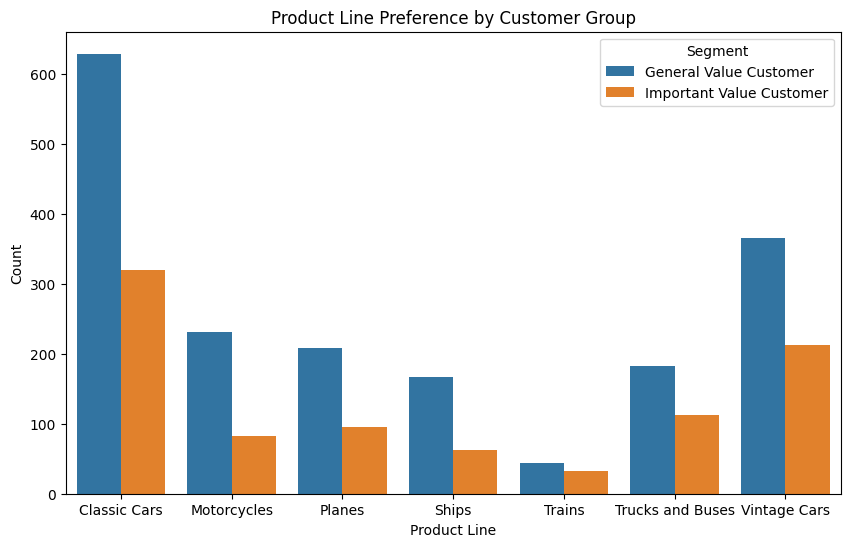

In [9]:
import seaborn as sns
product_line_counts = merge_df.groupby(['Segment', 'productline']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='productline', y='Count', hue='Segment', data=product_line_counts)
plt.title('Product Line Preference by Customer Group')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()


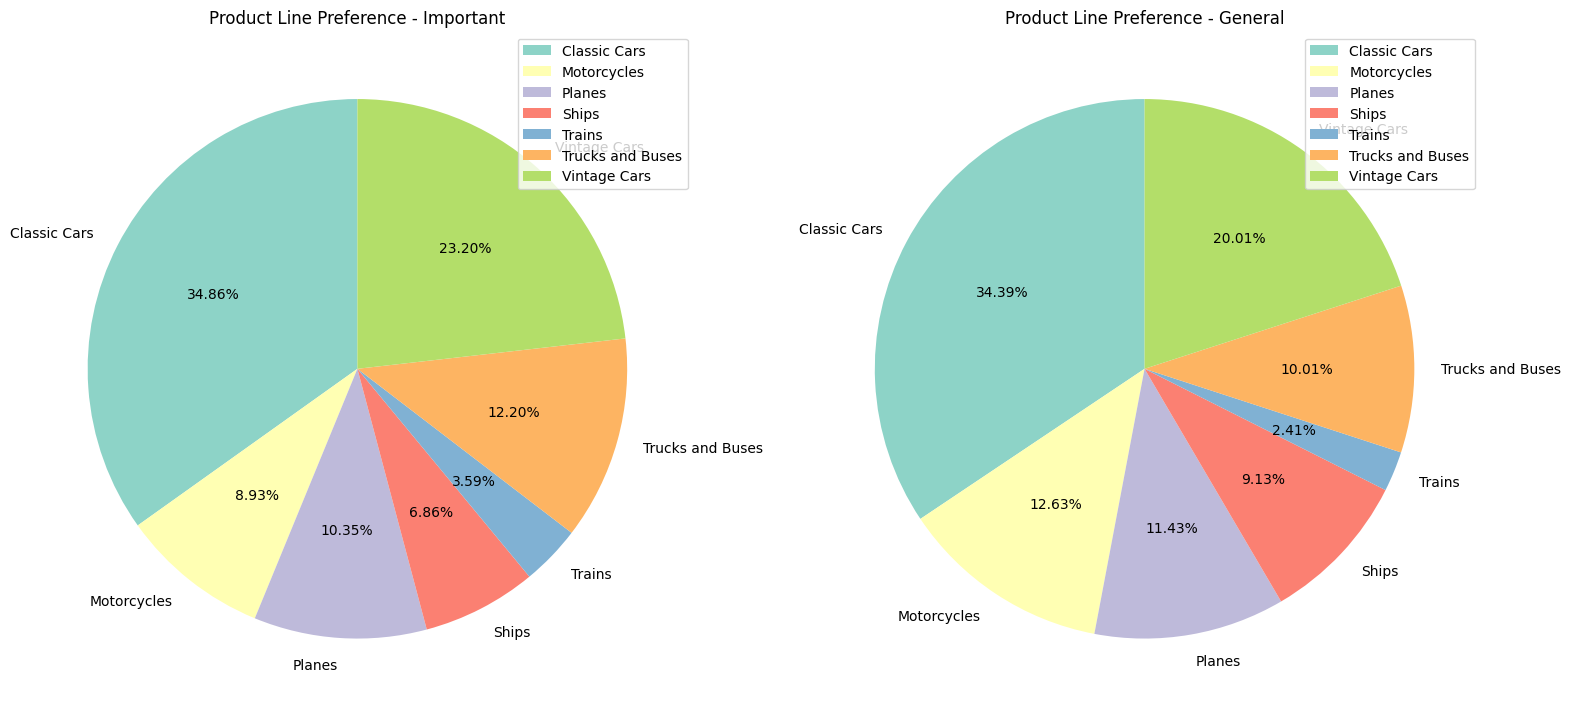

In [12]:
important = product_line_counts[product_line_counts['Segment'] == 'Important Value Customer']
general = product_line_counts[product_line_counts['Segment'] == 'General Value Customer']

kwrangs = {
    'autopct': '%1.2f%%',
    'startangle': 90,
    'colors': sns.color_palette('Set3'),
}

# Pie chart cho nhóm Khách hàng quan trọng
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.pie(important['Count'], labels=important['productline'], **kwrangs)
plt.title('Tỉ lệ sản phẩm yêu thích bởi khách hàng quan trọng')
plt.legend()

# Pie chart cho nhóm Khách hàng thường
plt.subplot(1, 2, 2)
plt.pie(general['Count'], labels=general['productline'], **kwrangs)
plt.title('Tỉ lệ sản phẩm yêu thích bởi khách hàng thường')
plt.legend()

plt.tight_layout()
plt.show()